# Main Figures from the paper
* Most of the figures in the paper are generated here except for Figures 3c, 6 and 11. 
* Figure 3c is found in the notebook: Figure-3c.ipynb
* Figure 6 is found in the notebook: Figure-6.ipynb
* Figure 11 is found in the notebook: educational

In [1]:
include("../src/DataAndPlotUtils.jl")

plot_prcurve (generic function with 2 methods)

In [25]:
datapath_6 = "../data/results/numS-6/"
datapath_12 = "../data/results/numS-12/"
files_fig2 = "ne-500/normal/" .* ["ols.jls", "lingam.jls", "gies.jls", "icp.jls", "wvm.jls"]
files_fig7 = "ne-500/mixed/" .* ["ols.jls", "lingam.jls", "gies.jls", "icp.jls", "wvm.jls"]
file_fig8 = "ne-500/normal/diff-alphas-wvm.jls"
file_fig9 = "ne-100/normal/diff-alpha-wvm-and-icp.jls"
file_fig10 = "ne-500/normal/diff-alpha-wvm-and-icp.jls"

df_fig1 = add_stat_columns(extract_dataframe(datapath_6, files_fig2), 50, 6, true)
df_fig7 = add_stat_columns(extract_dataframe(datapath_6, files_fig7), 50, 6, true)
df_fig8 = add_stat_columns(diff_alpha_results(datapath_6 * file_fig8), 50, 6, false)
df_fig9 = add_stat_columns(diff_alpha_results(datapath_6 * file_fig9, 
["FalsePositives", "FalseNegatives", "NumberofInferredCauses"], ["ICP", "WVM-0.1", "WVM-0.3", "WVM-0.5", "WVM-0.7"]), 50, 12, false);
df_fig10 = add_stat_columns(diff_alpha_results(datapath_12 * file_fig10, 
["FalsePositives", "FalseNegatives", "NumberofInferredCauses"], ["ICP", "WVM-0.1", "WVM-0.3", "WVM-0.5", "WVM-0.7"]), 50, 12, false);

# Figure 2 (a) + (b)

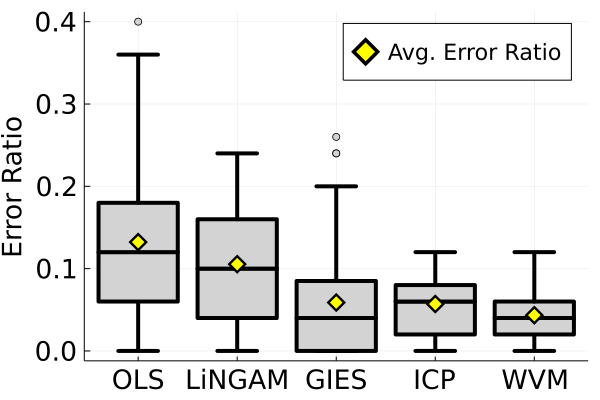

In [3]:
# Figure 2(a) : df, errortype, label, ylab, xlab="", legend=true, group=:Method, leg_position=:topright, dpi=100, addtilt=0
our_boxplot(df_fig1, :Error, "Avg. Error Ratio", "Error Ratio", "", true, :Method, :topright, 100)

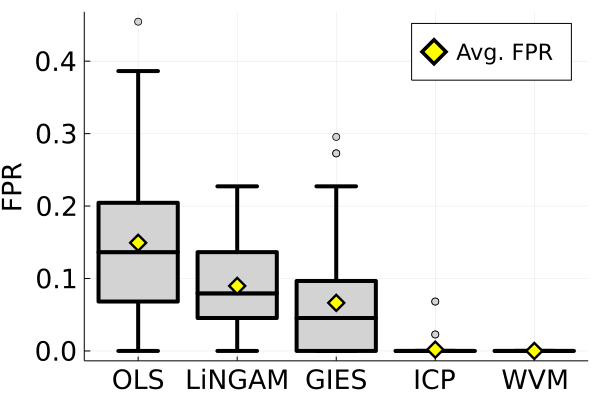

In [4]:
# Figure 2(b)
our_boxplot(df_fig1, :FPR, "Avg. FPR ", "FPR", "", true, :Method, :topright, 100)

# Figure 3 (a) + (b) + (d)

In [5]:
fp = "../data/results/numS-6/ne-500/normal/"
files = ["icp-time-power.jls", "wvm-time-power.jls"]
errors_icp, times_icp = deserialize(fp * files[1])
errors_wvm, times_wvm = deserialize(fp * files[2])
icp_avgfp = vec(mean(extract_mat(fix_list(errors_icp),1), dims=1))
icp_avgfn = vec(mean(extract_mat(fix_list(errors_icp),2), dims=1))
icp_times = fix_list(times_icp)

wvm_avgfp = vec(mean(extract_mat(fix_list(errors_wvm, 14),1), dims=1))
wvm_avgfn = vec(mean(extract_mat(fix_list(errors_wvm, 14),2), dims=1))
wvm_times = fix_list(times_wvm, 14);

In [6]:
fontsize, legsize = 18, 14

(18, 14)

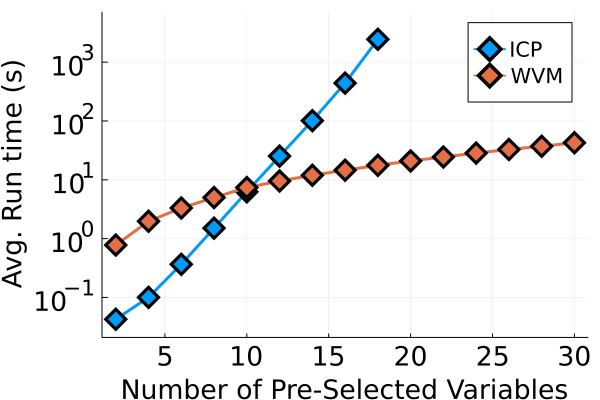

In [7]:
# Figure 3(a)
plot(2:2:18, vec(mean(icp_times, dims=2)), marker=:diamond, markersize=10, 
linewidth=3, label="ICP", markerstrokewidth=4)
plot!(2:2:30, vec(mean(wvm_times, dims=2)), marker=:diamond, markersize=10, linewidth=3, label="WVM", yaxis=:log, ylim=[0.03,5000], 
xtickfont=font(fontsize),ytickfont=font(fontsize), guidefont=font(fontsize), legendfontsize=legsize,
xlabel="Number of Pre-Selected Variables", 
ylabel="Avg. Run time (s)", legend=:topright, markerstrokewidth=4, dpi=100)

In [8]:
p1 = plot(2:2:18, icp_avgfp, label="ICP", marker=:diamond, markersize=10, linewidth=3, msw=4)
plot!(2:2:30, wvm_avgfp, label="WVM", marker=:diamond, markersize=10, linewidth=3,msw=4,ylim=[-0.05, 1],
xtickfont=font(fontsize),ytickfont=font(fontsize), legendfontsize=legsize, guidefont=font(fontsize), yticks=[0.0, 0.5, 1.0],
xlabel="",
ylabel="False Pos.", dpi=100);

In [9]:
p2 = plot(2:2:18, icp_avgfn, label="ICP", marker=:diamond, markersize=10, linewidth=3, msw=4)
plot!(2:2:30, wvm_avgfn, label="WVM", marker=:diamond, markersize=10, linewidth=3,msw=4, ylim=[1.5, 5.75],
xtickfont=font(fontsize),ytickfont=font(fontsize), guidefont=font(fontsize),
xlabel="Number of Pre-Selected Variables",
ylabel="False Neg.", dpi=100, legend=false);

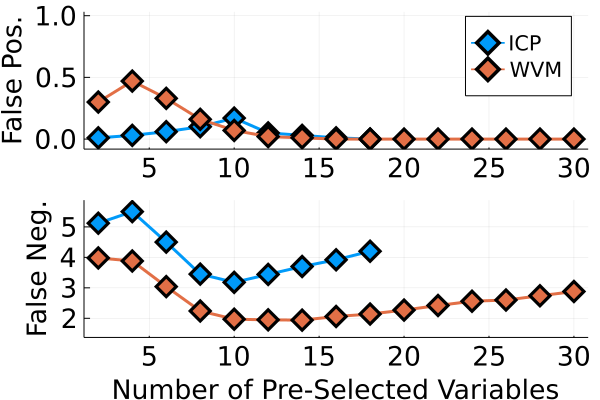

In [10]:
# Figure 3(b)
plot(p1, p2, dpi=100, layout = @layout grid(2, 1))

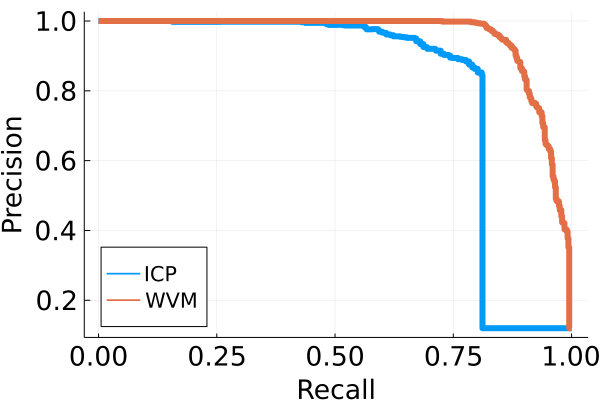

In [11]:
# Figure 3(d)
pr_icp_3d = prcurve(DataFrame(deserialize(datapath_6 * "ne-500/normal/pr-curve-icp.jls"), ["iscause", "pvals"]), 6)
pr_wvm_3d = prcurve(DataFrame(deserialize(datapath_6 * "ne-500/normal/pr-curve-wvm.jls"), ["iscause", "pvals"]), 6)
plot_prcurve(pr_icp_3d, pr_wvm_3d)

# Figure 4 (a) + (b)

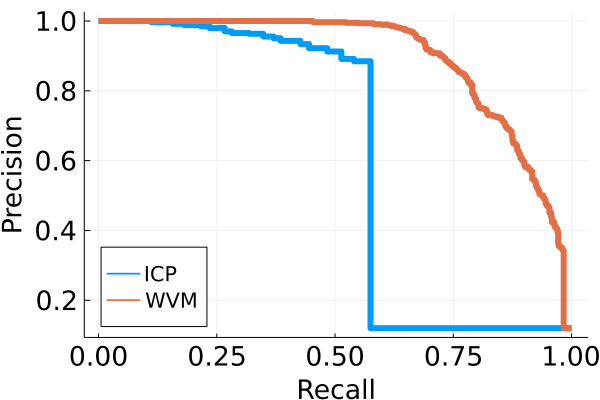

In [12]:
# Figure 4(a)
pr_icp_4a = prcurve(DataFrame(deserialize(datapath_6 * "ne-100/normal/pr-curve-icp.jls"), ["iscause", "pvals"]), 6)
pr_wvm_4a = prcurve(DataFrame(deserialize(datapath_6 * "ne-100/normal/pr-curve-wvm.jls"), ["iscause", "pvals"]), 6)
plot_prcurve(pr_icp_4a, pr_wvm_4a)

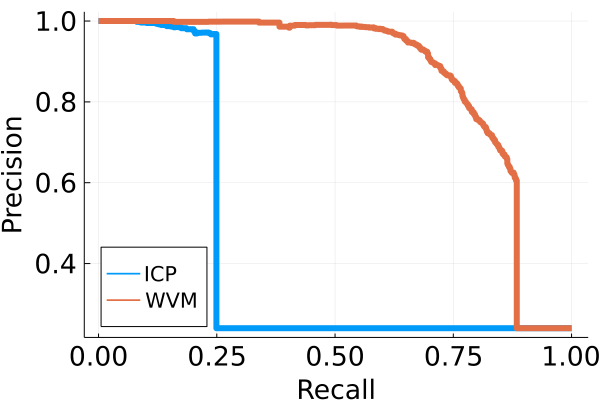

In [13]:
# Figure 4(b)
pr_icp_4b = prcurve(DataFrame(deserialize(datapath_12 * "ne-500/normal/pr-curve-icp.jls"), ["iscause", "pvals"]), 12)
pr_wvm_4b = prcurve(DataFrame(deserialize(datapath_12 * "ne-500/normal/pr-curve-wvm.jls"), ["iscause", "pvals"]), 12)
plot_prcurve(pr_icp_4b, pr_wvm_4b)

# Figure 7 (a) + (b)

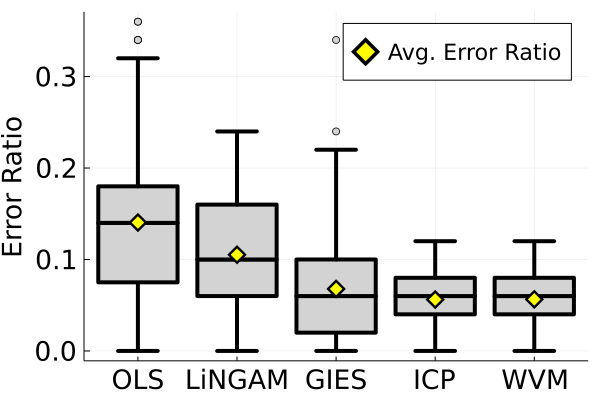

In [14]:
# Figure 7(a)
our_boxplot(df_fig7, :Error, "Avg. Error Ratio", "Error Ratio", "", true, :Method, :topright, 100)

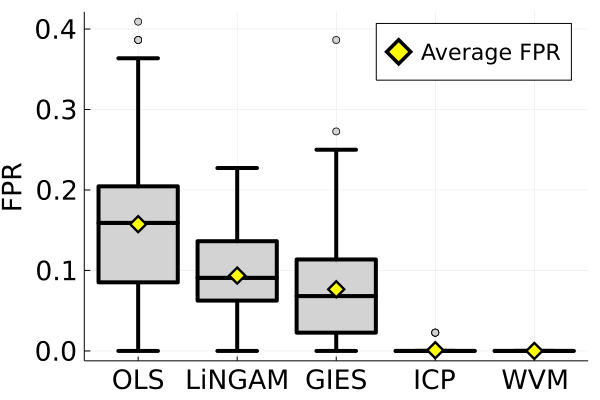

In [15]:
# Figure 7(b)
our_boxplot(df_fig7, :FPR, "Average FPR", "FPR", "", true, :Method, :topright, 100)

# Figure 8 (a) + (b)

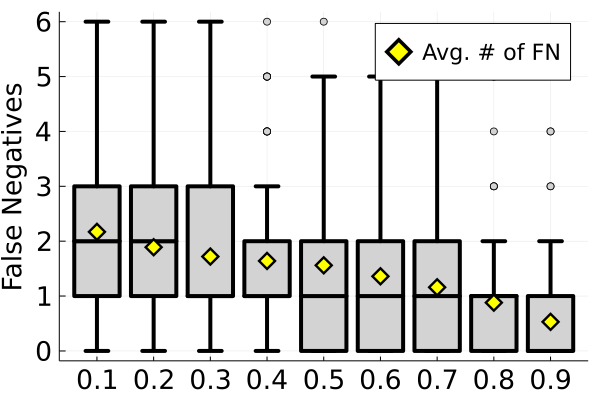

In [16]:
#Figure 8(a)
our_boxplot(df_fig8, :FNR, "Avg. # of FN", "False Negatives", "", true, :Alpha, :topright, 100)

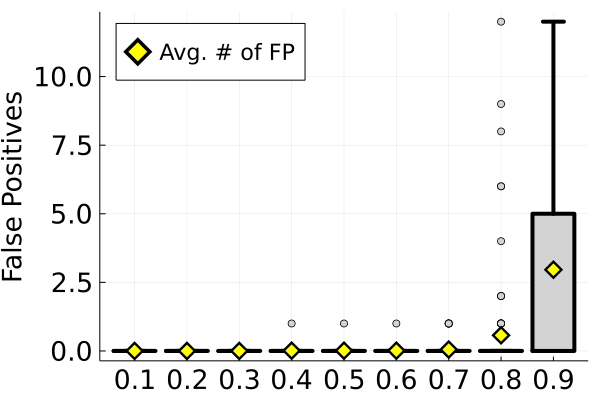

In [17]:
#Figure 8(b)
our_boxplot(df_fig8, :FPR, "Avg. # of FP", "False Positives", "", true, :Alpha, :topleft, 100)

# Figure 9 (a) + (b)

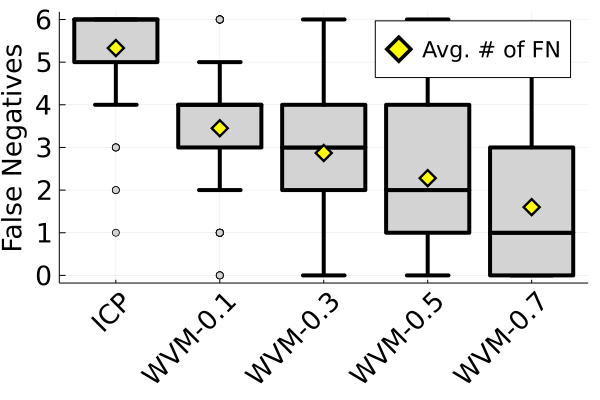

In [26]:
# Figure 9(a)
our_boxplot(df_fig9, :FNR, "Avg. # of FN", "False Negatives", "", true, :Alpha, :topright, 100, 45)

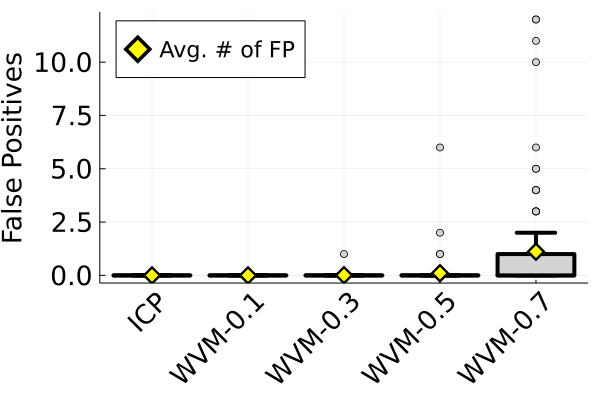

In [27]:
# Figure 9(b)
our_boxplot(df_fig9, :FPR, "Avg. # of FP", "False Positives", "", true, :Alpha, :topleft, 100, 45)

# Figure 10 (a) + (b)

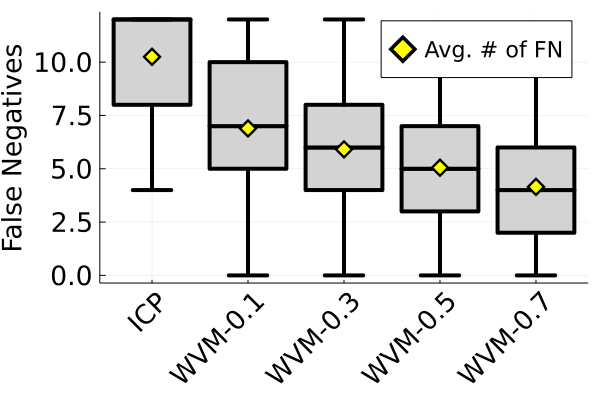

In [24]:
# Figure 10(a)
our_boxplot(df_fig10, :FNR, "Avg. # of FN", "False Negatives", "", true, :Alpha, :topright, 100, 45)

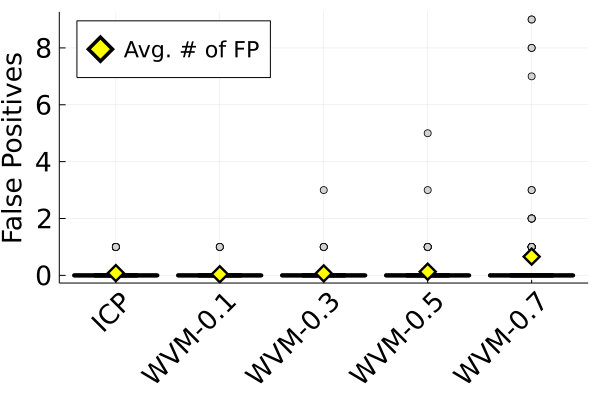

In [21]:
# Figure 10(b)
our_boxplot(df_fig10, :FPR, "Avg. # of FP", "False Positives", "", true, :Alpha, :topleft, 100, 45)